In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing  import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

In [2]:
can_df = pd.read_csv('/Users/thomaskiddoo/Library/CloudStorage/OneDrive-GettysburgCollege/DS 325/Dataset/Country-Wise Data/Canada_dataset.csv')
can_df.columns
can_df = can_df.drop(columns=['Country', 'Area', 'Date'])

In [3]:
can_df.head()

,Waterbody Type,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values,CCME_WQI
0,River,0.059248,1.30,8.1500,0.011917,8.07500,9.885,0.343917,11.73155,100.0,Excellent
1,River,0.039821,1.38,7.8000,0.009417,7.73333,10.150,0.449083,11.82009,100.0,Excellent
2,River,0.031341,2.23,7.8000,0.011000,7.46667,10.235,0.220750,14.87472,100.0,Excellent
3,River,0.020501,1.61,8.1500,0.012333,7.78333,11.116,0.572250,15.89293,100.0,Excellent
4,River,0.020023,1.64,4.3708,0.006182,7.10000,7.068,0.371091,15.22888,100.0,Excellent


In [4]:
can_df.columns

Index(['Waterbody Type', 'Ammonia (mg/l)', 'Biochemical Oxygen Demand (mg/l)',
       'Dissolved Oxygen (mg/l)', 'Orthophosphate (mg/l)', 'pH (ph units)',
       'Temperature (cel)', 'Nitrogen (mg/l)', 'Nitrate (mg/l)', 'CCME_Values',
       'CCME_WQI'],
      dtype='object')

In [ ]:
y = can_df['Waterbody Type']
#y = pd.DataFrame(y)
X = can_df.drop(columns = 'Waterbody Type')

cat_features = ['CCME_WQI']
oneHotEnc = OneHotEncoder()

num_features = ['Ammonia (mg/l)', 'Biochemical Oxygen Demand (mg/l)', 'Dissolved Oxygen (mg/l)',
                'Orthophosphate (mg/l)', 'pH (ph units)', 'Temperature (cel)', 'Nitrogen (mg/l)',
                'Nitrate (mg/l)', 'CCME_Values']
ss = StandardScaler()


coltrans = ColumnTransformer(
    transformers=[
        #("ord", ordEnc, ord_features),   # (nickname, transformer object variable, which columns to apply to)
        ("onehot", oneHotEnc, cat_features),
        ('ss', ss, num_features)
        ],
    remainder = 'passthrough',
    verbose_feature_names_out=False)

X_trans = coltrans.fit_transform(X)

'''
#WQI = ['Poor', 'Marginal', 'Fair', 'Good', 'Excellent']
WQI = ['Excellent', 'Good', 'Fair', 'Marginal', 'Poor']  # Reordered for ordinal encoding
ord_features = ['CCME_WQI']
ordEnc = OrdinalEncoder(categories = [WQI])
'''
'''
ct = ColumnTransformer(
    transformers=[
        ("ord", ordEnc, ord_features),   # (nickname, transformer object variable, which columns to apply to)
        ],
    remainder = 'passthrough',
    verbose_feature_names_out=False)


y_trans = ct.fit_transform(y)
y_trans
'''

#labEnc = LabelEncoder()
#y_trans = labEnc.fit_transform(y)

In [7]:
labEnc = LabelEncoder()
y_trans = labEnc.fit_transform(y)
y_trans
label_names = labEnc.classes_
label_names

array(['Coastal', 'Lake', 'River', 'Transitional'], dtype=object)

In [8]:
feature_names = coltrans.get_feature_names_out()
X_df = pd.DataFrame(X_trans, columns = feature_names)
X_df

,CCME_WQI_Excellent,CCME_WQI_Fair,CCME_WQI_Good,CCME_WQI_Marginal,CCME_WQI_Poor,Ammonia (mg/l),Biochemical Oxygen Demand (mg/l),Dissolved Oxygen (mg/l),Orthophosphate (mg/l),pH (ph units),Temperature (cel),Nitrogen (mg/l),Nitrate (mg/l),CCME_Values
0,1.0,0.0,0.0,0.0,0.0,-0.217563,-0.255110,-1.212640,-0.174862,0.610781,-0.622070,-0.240674,0.111597,0.791273
1,1.0,0.0,0.0,0.0,0.0,-0.222930,-0.244287,-1.455564,-0.175917,0.071589,-0.557074,-0.165098,0.118055,0.791273
2,1.0,0.0,0.0,0.0,0.0,-0.225273,-0.129293,-1.455564,-0.175249,-0.349229,-0.536226,-0.329186,0.340866,0.791273
3,1.0,0.0,0.0,0.0,0.0,-0.228268,-0.213171,-1.212640,-0.174686,0.150494,-0.320144,-0.076587,0.415137,0.791273
4,1.0,0.0,0.0,0.0,0.0,-0.228401,-0.209113,-3.835663,-0.177282,-0.927874,-1.312991,-0.221146,0.366699,0.791273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3944,0.0,0.0,1.0,0.0,0.0,-0.114359,0.019969,-2.441141,-0.138162,-1.874738,-0.287278,-0.429974,-0.440200,0.137995
3945,0.0,0.0,1.0,0.0,0.0,0.079023,-0.205500,-1.094648,-0.132128,-1.664376,0.107604,-0.445784,-0.518184,-0.577167
3946,0.0,0.0,1.0,0.0,0.0,-0.228595,-0.258492,0.956324,-0.175671,1.369219,0.201885,-0.445784,-0.655326,0.240889
3947,1.0,0.0,0.0,0.0,0.0,-0.170253,-0.160409,-0.072764,-0.171634,-0.438660,-0.624221,-0.445784,0.292171,0.791273


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, test_size= 0.2)

tree_clf = DecisionTreeClassifier(max_depth = 4)

tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

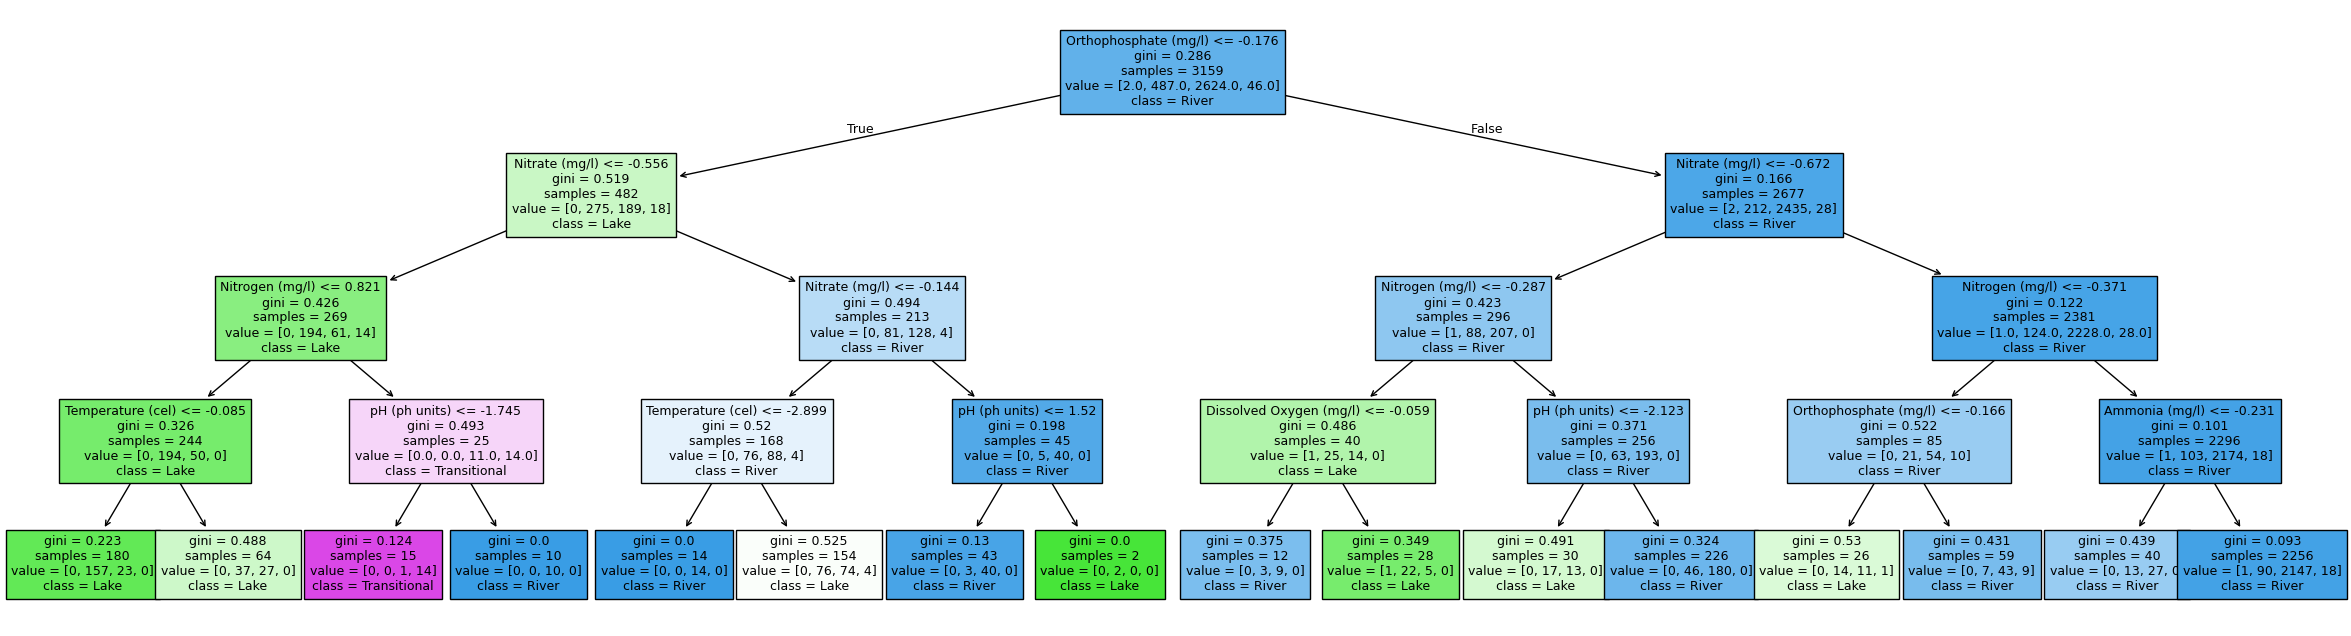

In [12]:
fig, ax = plt.subplots(1,1, figsize = (30, 8))
plot_tree(tree_clf,
          filled = True, fontsize = 9,
          feature_names = feature_names, class_names = label_names)

plt.show()

In [15]:
label_names

array(['Coastal', 'Lake', 'River', 'Transitional'], dtype=object)

(790,)

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (4).

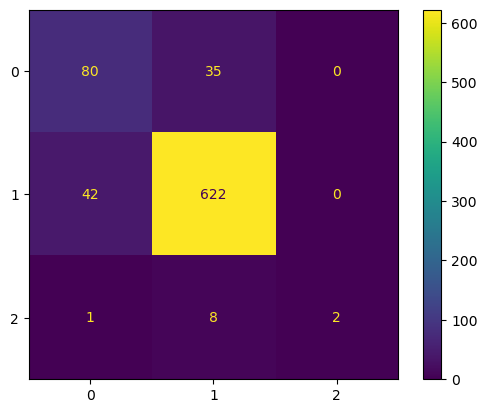

In [19]:
cfm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cfm, display_labels = label_names).plot()
plt.show()